#  Comparing Developers in GCC to Developers in the Rest of the world by analysing 2020 Stack Overflow Annual Developer Survey 

I am a developer in Saudi Arabia which is part of the GCC (Gulf Cooperation Council) who studied Software Engineering degreee in the UK. I couldn't help but notice the slighly different approach to development between my days in the UK and my days in Saudi. The GCC countries are not known for taking a lead in terms of developing new solutions but rather adopting solutions and enhancing them. This has left me personally slightly disappointed since I wanted to work on introducing new solutions that will change the indsutry like the ones introduced by Google, Amazon, and Uber.

I wanted to use the 2020 stack overflow annual developer survey to answer some of the questions that I think are related to my situaition. 
1. How many developers in GCC develop for a hobby? and how does that compare to the rest of the world?
2. How satisfied are those developers in their current jobs in comparison to developers in the rest of the world?
3. How do dissatisfied developers in GCC compare to developers in rest of the world in terms of seeking new job opportunity?

## Section 1: Import Data

In [468]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('./developer_survey_2020/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


## Question 1: How do developers that code for a hobby in GCC (Gulf Cooperation Council) compare to develoeprs in the Rest of the World? 

The GCC countries are not known for their technological advancement, espicially if we are talking about development rather than technology adoption. I would like to compare the percentage of developers in those GCC countries that actually develop for a hobby and enjoy development rather than just do it for living to the rest of the world. 

In [470]:
gcc_countries = ['United Arab Emirates', 'Bahrain', 'Oman', 'Kuwait', 'Qatar', "Saudi Arabia"]
df_gcc = df[df['Country'].isin(gcc_countries)]
#Rest of the world
df_rotw = df[~df['Country'].isin(gcc_countries)]

In [471]:
# Verify that the 3 new dataframes add up to the initial dataframe to ensure no data is lost.
len(df) == len(df_gcc) + len(df_rotw)

True

In [472]:
#Know the number of missing values
print("There are", df_gcc['Hobbyist'].isnull().sum(), " missing values in the GCC")
print("There are", df_rotw['Hobbyist'].isnull().sum(), " missing values in the rest of the world")

There are 0  missing values in the GCC
There are 45  missing values in the rest of the world


In [473]:
#Dropping missing Values
df_rotw = df_rotw.dropna(subset=['Hobbyist'],axis=0)
print("There are", df_rotw['Hobbyist'].isnull().sum(), " missing values in the rest of the world now")

There are 0  missing values in the rest of the world now


In [475]:
#Compare developers that develop for a hobby to GCC and ROW
percentage_gcc_hobbyiest = df_gcc["Hobbyist"].value_counts()[0] / len(df_gcc) * 100
percentage_rotw_hobbyiest = df_rotw["Hobbyist"].value_counts()[0] / len(df_rotw) * 100
print("The percentage of developers in GCC that  code as a hobby is", percentage_gcc_hobbyiest,
      "\nThe percentage of developers in the rest of the world that code as a hobby is", percentage_rotw_hobbyiest)

The percentage of developers in GCC that  code as a hobby is 73.76425855513308 
The percentage of developers in the rest of the world that code as a hobby is 78.24107991832027


We can tell from this analysis that the percentage of developers who develop for a hobby in GCC is slightly less than those in the rest of the world.

## Question 2: How satisfeied are developers that code for a hobby in GCC in comparison to Rest of the world?

I would like to  investigate the job satisfcation % of those who enjoy coding in those two areas. 

In [477]:
df_gcc_satisfaction = df_gcc[['Hobbyist','JobFactors','JobSat','JobSeek']]
#drop missing hobbyist values
df_gcc_satsifaction = df_gcc_satisfaction.dropna(subset=['Hobbyist'],axis=0)
#drop those that don't develop for a hobby
df_gcc_satisfaction = df_gcc_satisfaction[df_gcc_satisfaction['Hobbyist'] == 'Yes']
#drop missing job satsifaction values
df_gcc_satisfaction = df_gcc_satisfaction.dropna(subset=['JobSat'],axis=0)


#do the same for rest of the world
df_rotw_satisfaction = df_rotw[['Hobbyist','JobFactors','JobSat','JobSeek']]
#drop missing hobbyist values
df_rotw_satisfaction = df_rotw_satisfaction.dropna(subset=['Hobbyist'],axis=0)
#drop those that don't develop for a hobby
df_rotw_satisfaction = df_rotw_satisfaction[df_rotw_satisfaction['Hobbyist'] == 'Yes']
#drop missing job satsifaction values
df_rotw_satisfaction = df_rotw_satisfaction.dropna(subset=['JobSat'],axis=0)

In [479]:
#Count the satsifaciton values
df_gcc_satisfaction_values = df_gcc_satisfaction['JobSat'].value_counts().to_frame().rename_axis('Satisfaction Level')
df_gcc_satisfaction_values.rename(columns={"JobSat": "Count"},inplace = True)
df_rotw_satisfaction_values = df_rotw_satisfaction['JobSat'].value_counts().to_frame().rename_axis('Satisfaction Level')
df_rotw_satisfaction_values.rename(columns={"JobSat": "Count"},inplace = True)
df_gcc_satisfaction_values

,Count
Satisfaction Level,
Slightly satisfied,29
Very satisfied,24
Neither satisfied nor dissatisfied,24
Slightly dissatisfied,23
Very dissatisfied,13


Plot a bar chart showing developers and their satisfaction levels

In [480]:
def get_satisfaction_percentage(df,values_to_count,total):
    values_sum = 0
    for value in values_to_count:
        values_sum = values_sum + df.loc[value,'Count']
    
    percentage = values_sum / total * 100
    return percentage


def analyze_satisfaction (df,title_portion):
    df.plot(kind='bar')
    plt.title("Satisfaction Level of Developers in " + title_portion)
    plt.xlabel("Satisfaction Level")
    plt.ylabel("Number of developers at this satisfaction level")
    plt.show()
    
    total_developers = df['Count'].sum()
    satisfied_perc = get_satisfaction_percentage(df,['Very satisfied','Slightly satisfied'],total_developers)
    neutral_perc = get_satisfaction_percentage(df,['Neither satisfied nor dissatisfied'],total_developers)
    dissatsified_perc = get_satisfaction_percentage(df,['Very dissatisfied','Slightly dissatisfied'],total_developers)

    print("In ", title_portion, "an analysis conducted on ", total_developers,
          " developers shows that \nthe  percentage of developers who are satisfied is:", satisfied_perc, " %" 
      "\n The percentage of developers who are neutral is:", neutral_perc, " %" 
      "\n The percentage of developers who are dissatisfied is:", dissatsified_perc, " %" )
    


    

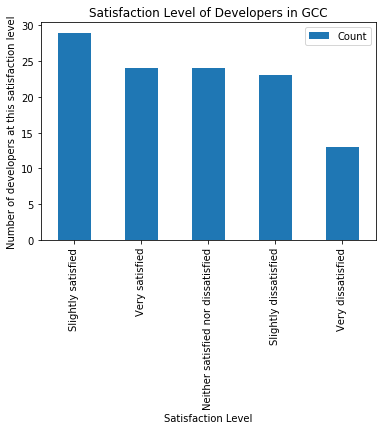

In  GCC an analysis conducted on  113  developers shows that 
the  percentage of developers who are satisfied is: 46.902654867256636  %
 The percentage of developers who are neutral is: 21.238938053097346  %
 The percentage of developers who are dissatisfied is: 31.858407079646017  %


In [481]:
analyze_satisfaction(df_gcc_satisfaction_values, "GCC")

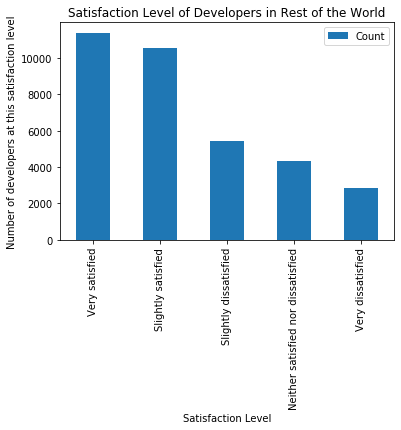

In  Rest of the World an analysis conducted on  34504  developers shows that 
the  percentage of developers who are satisfied is: 63.57233943890564  %
 The percentage of developers who are neutral is: 12.543473220496173  %
 The percentage of developers who are dissatisfied is: 23.884187340598192  %


In [482]:
analyze_satisfaction(df_rotw_satisfaction_values, "Rest of the World")

The result of the analysis tells us that the percentage of developers (who develop for a hobby) who are satisifeid on their job in GCC is less by a significant 16.7%.

## Question3: What is the percentage of dissatisfied developers in GCC that are activly seeking new job ? and how do they compare to dissatsfied developers in the rest of the world?

In [496]:
#get dissatisfied developers only and drop missing job seeking values
df_gcc_dissatisfied = df_gcc_satisfaction[df_gcc_satisfaction['JobSat'].isin(['Very dissatisfied','Slightly dissatisfied'])]
df_rotw_dissatisfied = df_rotw_satisfaction[df_rotw_satisfaction['JobSat'].isin(['Very dissatisfied','Slightly dissatisfied'])]

df_gcc_dissatisfied = df_gcc_dissatisfied.dropna(subset=['JobSeek'],axis = 0)
df_rotw_dissatisfied = df_rotw_dissatisfied.dropna(subset=['JobSeek'],axis = 0)

In [594]:
def analyze_job_seek (df,title_portion):
    #adjust dataframe
    df = df['JobSeek'].value_counts().sort_index().to_frame()
    #plot the pie chart
    df['JobSeek'].plot(kind='pie',subplots=True,figsize=(8,8),labels=None, autopct='%1.0f%%')
    plt.title("Dissatisfied Developers in " + title_portion + " and their Job Seeking Stauts Percentage")
    labels=df.index.unique()
    plt.legend(labels, bbox_to_anchor=(1,0.2), loc="center right", fontsize=10,bbox_transform=plt.gcf().transFigure)
    plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
    plt.show()

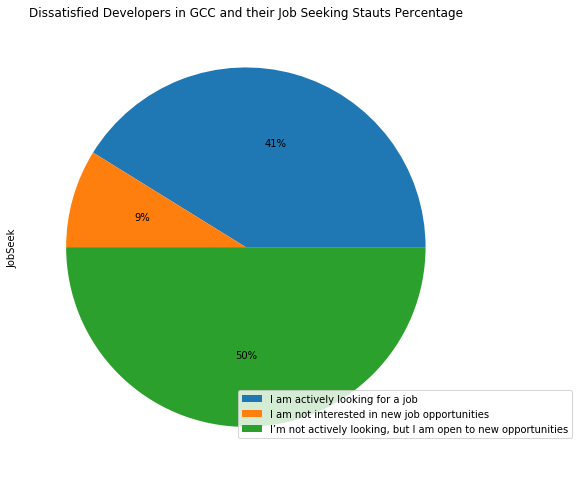

In [591]:
analyze_job_seek(df_gcc_dissatisfied,"GCC")

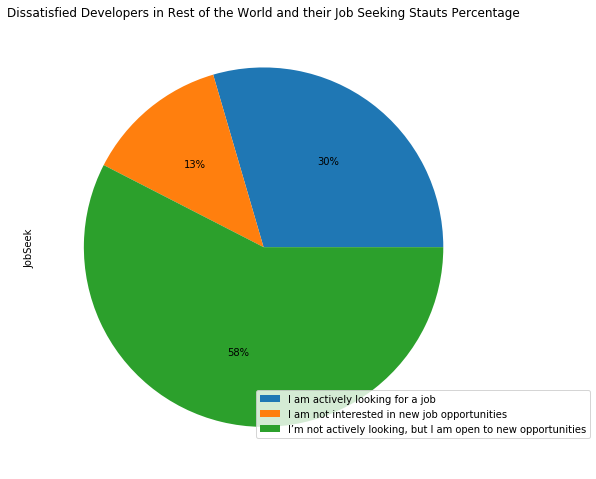

In [593]:
analyze_job_seek(df_rotw_dissatisfied,"Rest of the World")

Finally, based on the analysis of dissatisfied developers in GCC and Rest of the World. IT seems like the dissatisfied developers in GCC are more activy looking for a job than developers in the rest of the world. 